In [41]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

In [57]:
df = gpd.read_file("transbase_victims_01112023.json")

In [43]:
df.head()

,case_id_pkey,collision_severity,accident_year,collision_date,collision_time,distance,direction,vz_pcf_description,pcf_violation,pcf_viol_subsection,...,street_of_travel,victim_role,victim_sex,victim_age,victim_degree_of_injury,victim_seating_position,victim_safety_equip_1,victim_safety_equip_2,victim_ejected,geometry
0,200489216,Injury (Severe),2020,2020-08-14,20:53:00,29,East,Unsafe speed for prevailing conditions,22350.0,None,...,PALOU AVENUE,Pedestrian,Female,55.0,Severe Injury,Not Stated,Not Stated,Not Stated,Not Stated,POINT (-122.37991 37.72774)
1,220025107,Injury (Severe),2022,2022-01-12,12:00:00,0,Not Stated,Driver or bicyclist to yield right-of-way at c...,21950.0,None,...,HAHN ST,Pedestrian,Male,85.0,Severe Injury,Not Stated,Not Stated,Not Stated,Not Stated,POINT (-122.41600 37.71191)
2,210092188,Fatal,2021,2021-02-10,10:11:00,0,Not Stated,Pedestrians must yield right-of-way outside of...,21954.0,None,...,REDONDO STREET,Pedestrian,Male,12.0,Fatal Injury,Not Stated,Not Stated,Not Stated,Not Stated,POINT (-122.39205 37.71858)
3,200298976,Injury (Severe),2020,2020-05-16,17:46:00,22,East,Failure of driver or bicyclist to exercise due...,21954.0,None,...,FITZGERALD AVE,Pedestrian,Male,37.0,Severe Injury,Not Stated,Not Stated,Not Stated,Not Stated,POINT (-122.39497 37.72306)
4,220601020,Injury (Severe),2022,2022-09-04,18:33:00,65,West,Unknown,NaN,None,...,OLMSTEAD STREET,Pedestrian,Male,NaN,Severe Injury,Not Stated,Not Stated,Not Stated,Not Stated,POINT (-122.40282 37.72252)


In [58]:
df.victim_sex = df.victim_sex.replace(np.nan,"person")
df.victim_age = df.victim_age.replace(np.nan,"unknown")

In [39]:
df.columns

Index(['case_id_pkey', 'collision_severity', 'accident_year', 'collision_date',
       'collision_time', 'distance', 'direction', 'vz_pcf_description',
       'pcf_violation', 'pcf_viol_subsection', 'type_of_collision', 'mviw',
       'street_view', 'primary_rd', 'secondary_rd', 'dph_col_grp',
       'day_of_week', 'time_cat', 'weather_1', 'vz_pcf_code', 'intersection',
       'month', 'vz_pcf_link', 'x_street_comb', 'lighting', 'number_killed',
       'number_injured', 'latitude', 'longitude', 'cnn_sgmt_fkey',
       'full_street_name', 'from_intrsctn', 'to_intrsctn', 'st_lat', 'st_long',
       'dph_col_grp_description', 'road_surface', 'ped_action',
       'control_device', 'pst_pull_date_time', 'bndy_type', 'party_at_fault',
       'party1_type', 'party1_dir_of_travel', 'party1_move_pre_acc',
       'party2_type', 'party2_dir_of_travel', 'party2_move_pre_acc',
       'party_number_ckey', 'party_type', 'at_fault', 'party_sex', 'party_age',
       'party_sobriety', 'party_drug_physic

In [4]:
df.shape

(325, 78)

In [59]:
df['collision_date']= pd.to_datetime(df['collision_date'],format='%Y%m%d').dt.date.astype(str)
df['collision_time']= pd.to_datetime(df['collision_time'],format='%H%M').dt.time.astype(str)

In [5]:
df.victim_age.mean()

47.06410256410256

(array([ 1.,  0.,  0.,  0.,  2.,  2.,  1.,  3.,  8., 15., 18., 23., 23.,
        22.,  9., 17., 14., 20., 11., 20., 22., 17., 14., 12.,  8., 15.,
         3.,  6.,  5.,  1.]),
 array([-16.        , -12.26666667,  -8.53333333,  -4.8       ,
         -1.06666667,   2.66666667,   6.4       ,  10.13333333,
         13.86666667,  17.6       ,  21.33333333,  25.06666667,
         28.8       ,  32.53333333,  36.26666667,  40.        ,
         43.73333333,  47.46666667,  51.2       ,  54.93333333,
         58.66666667,  62.4       ,  66.13333333,  69.86666667,
         73.6       ,  77.33333333,  81.06666667,  84.8       ,
         88.53333333,  92.26666667,  96.        ]),
 <BarContainer object of 30 artists>)

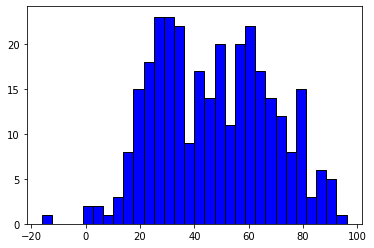

In [11]:
plt.hist(df['victim_age'], color = 'blue', edgecolor = 'black', bins = 30)

In [29]:
df.dtypes

case_id_pkey                        int64
collision_severity                 object
accident_year                       int64
collision_date             datetime64[ns]
collision_time                     object
                                ...      
victim_seating_position            object
victim_safety_equip_1              object
victim_safety_equip_2              object
victim_ejected                     object
geometry                         geometry
Length: 78, dtype: object

In [60]:
df.to_file('pedestrian2020-2022.geojson', driver='GeoJSON')